Ihtisham Ahmad <br>
Bhavesh Jain <br>
Sassan Owssia <br>
Maria Lomaeva

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Exercise 1

### i)

Since `P` only gives the forecast for one day forward, we need to multiply the matrix by itself to get predictions for 2 days forward.

In [2]:
P = np.array([[2/3, 1/5], [1/3, 4/5]])

In [3]:
P2 = np.linalg.matrix_power(P, 2)

In [4]:
print('Probability of having a sunny day the day after tomorrow:', P2[0, 0])
print('Probability of having a rainy day the day after tomorrow:', P2[1, 0])

Probability of having a sunny day the day after tomorrow: 0.5111111111111111
Probability of having a rainy day the day after tomorrow: 0.4888888888888889


### ii)

$lim_{P -> \inf} P^n$ can be found through matrix diagonalisation and eigen decompostion

In [5]:
# np returns normalised eig vectors
eig_values, eig_vectors = np.linalg.eig(P)
eig_inv = np.linalg.inv(eig_vectors)

In [6]:
print('Eigenvalues', eig_values)
print('Eigenvectors', eig_vectors)
print('Inverse eigenvectors', eig_inv)

Eigenvalues [0.46666667 1.        ]
Eigenvectors [[-0.70710678 -0.51449576]
 [ 0.70710678 -0.85749293]]
Inverse eigenvectors [[-0.88388348  0.53033009]
 [-0.72886899 -0.72886899]]


$P^n = \begin{pmatrix}
  -0.70710678 & -0.51449576\\ 
  0.70710678 & -0.85749293
\end{pmatrix}\begin{pmatrix}
  0.46666667 & 0\\ 
  0 & 1.
\end{pmatrix}\begin{pmatrix}
  -0.88388348 & 0.53033009\\ 
  -0.72886899 & -0.72886899
\end{pmatrix}$

$ = \begin{pmatrix}
  -0.70710678 & -0.51449576\\ 
  0.70710678 & -0.85749293
\end{pmatrix}\begin{pmatrix}
  0.46666667^n & 0\\ 
  0 & 1^n
\end{pmatrix}\begin{pmatrix}
  -0.88388348 & 0.53033009\\ 
  -0.72886899 & -0.72886899
\end{pmatrix}$

$ = \begin{pmatrix}
  -0.70710678 \cdot 0.46666667^n & -0.51449576\\ 
  0.70710678 \cdot 0.46666667^n & -0.85749293
\end{pmatrix}\begin{pmatrix}
  -0.88388348 & 0.53033009\\ 
  -0.72886899 & -0.72886899
\end{pmatrix}$

$ = \begin{pmatrix}
  0.7071 \cdot 0.4666^n \cdot 0.8838 + (0.51449576 \cdot 0.72886899) & (-0.7071 \cdot 0.4666^n \cdot 0.5303 + (0.51449576 \cdot 0.72886899)\\ 
  -0.7071 \cdot 0.4666^n \cdot 0.8838 + (0.85749293 \cdot 0.72886899) & (-0.7071 \cdot 0.4666^n \cdot 0.5303 + (0.85749293 \cdot 0.72886899)
\end{pmatrix}$

Because n -> inf we have:

$ = \begin{pmatrix}
  (0.51449576 \cdot 0.72886899) & (0.51449576 \cdot 0.72886899)\\ 
  (0.85749293 \cdot 0.72886899) & (0.85749293 \cdot 0.72886899)
\end{pmatrix}$

$ = \begin{pmatrix}
  0.375 & 0.375\\ 
  0.625 & 0.625
\end{pmatrix}$

We have derived the relative frequency of sunny days which is 0.375

### iii)

The invariant measure is equal to (0.375 0.625) because: 

$\begin{pmatrix}
  2/3 & 1/5\\ 
  1/3 & 4/5
\end{pmatrix}\begin{pmatrix}
  15/4\\ 
  27/4
\end{pmatrix} = $

In [7]:
P = np.array([[2/3, 1/5], [1/3, 4/5]])
inv = np.array([0.375, 0.625])
print(np.matmul(P, inv))

[0.375 0.625]


Moreover, part **ii** shows that the chain converges to the invariant measure.

# Exercise 2

### i)

In [8]:
def f(x): 
    return -x*(x-2)
def euler(h, x0):
    h = 0.1 # Step size
    t = np.arange(0, 1 + h, h) # Numerical grid
    #x0 = -2 # Initial Condition

    # Explicit Euler Method
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(0, len(t) - 1):
        x[i + 1] = x[i] + h*f(x[i])

    plt.figure(figsize = (12, 8))
    plt.plot(t, x, 'bo--', label='Approximate')
    #plt.plot(t, -x*(x-2), 'g', label='Exact')
    plt.title('Euler method Solution ODE')
    plt.xlabel('t')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

#### X(0) = - 2

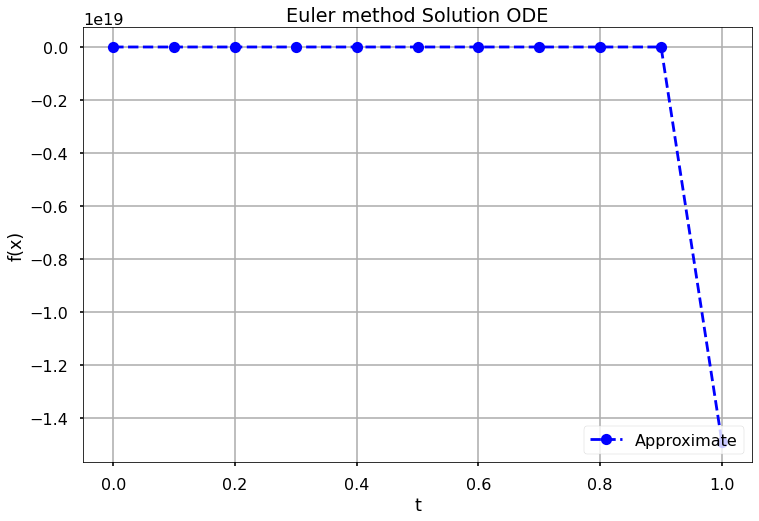

In [9]:
euler(1,-2)

When x0 is -2 , we can see euler methods gives us 0 for most of the initial values and start moving negatively at the end of the graph.

#### X(0) = 0.5

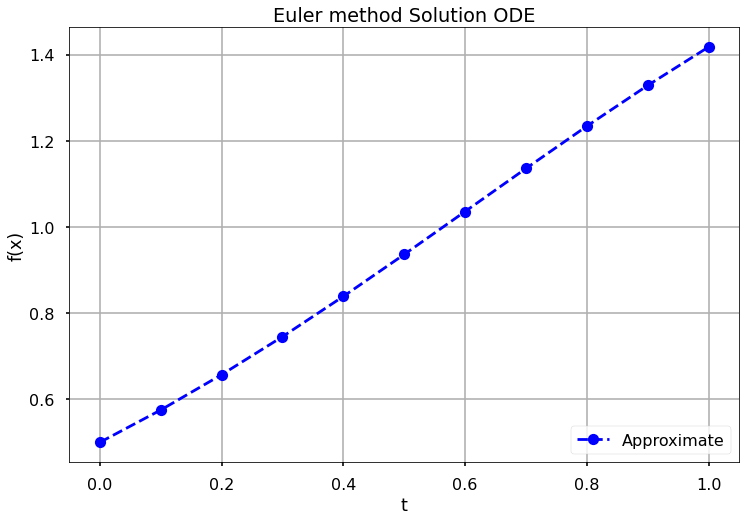

In [10]:
euler(1,0.5)

With initial condition x0 = 0.5, euler method gives us a linear solution.

### X(0) = 2

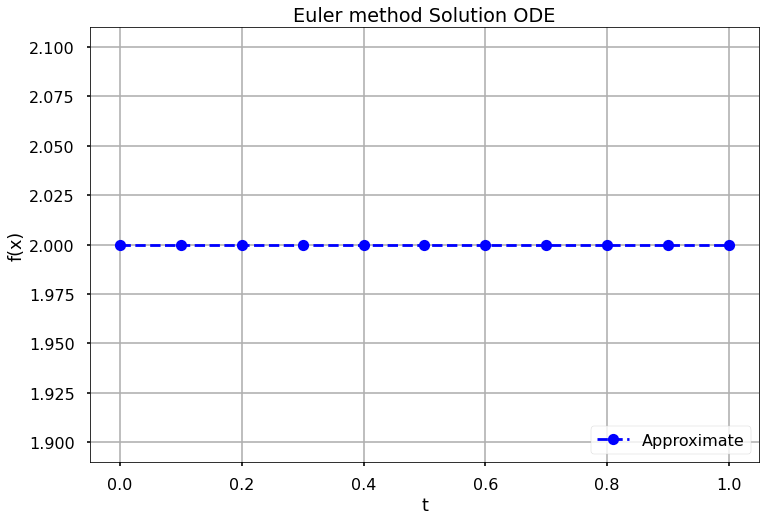

In [11]:
euler(1,2)

When x0 = 2, euler method gives solution always equal to 2 because our ODE equation gives 0 always.

## Part(ii)

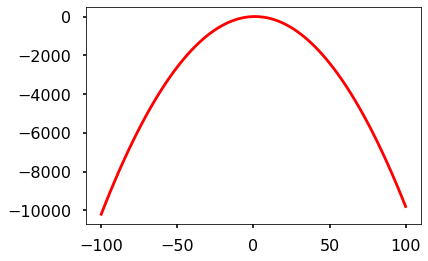

In [12]:
x = np.linspace(-100, 100, 100)
plt.plot(x, f(x), color='red')

Graph of our function shows that function is always negative or 0. 

if f(x) > 0 , there will be a positive change in next prediction.

if f(x) < 0 , there will be a negative change in next prediction

if f(x) = 0 , that means the dynamic system has not changed its state in next prediction.

## Part (iii)

Point 2 is invariant, as when x(0) was equal to 2, system didn't get changed.

## Part (iv)

If t approaches infinity, then x(t) behavior will depend on the initial or starting position.

If x(0)= 0.5, x(t) will become unchanged at point 2.

If x(0)= 2, x(t) will be constant at point 2 again.

If x(0) = -2, it will approach negative infinity.

# Exercise 3

### i)

Assuming that $\epsilon_n$ ~ $N(0,1)$ We have that $x_1$ and $x_2$ also follow a Normal Distribution because any linear function of a random variable with normal distribution itself follows a normal distribution. 

Now we need to find the expectation and variance for $x_1$ and $x_2$:

$$E(x_1) = E(x_0 -\delta t x_0 + \sqrt{2\delta t} \epsilon_n)$$
$$ = 1 - \delta t * 1 + \sqrt{2\delta t} E(\epsilon_n)$$
$$ = 1 - \delta t * 1 + \sqrt{2\delta t} * 0$$
$$E(x_1) = 1 - \delta t$$

$$Var(x_1) = Var(x_0 -\delta t x_0 + \sqrt{2\delta t} \epsilon_n)$$
$$ = 0 - 0 + Var( \sqrt{2\delta t} \epsilon_n)$$
$$ = 2\delta t   Var(\epsilon_n)$$
$$Var(x_1) = 2\delta t$$

$$E(x_2) = E(x_1 -\delta t x_1 + \sqrt{2\delta t} \epsilon_n)$$ 
$$ = (1 - \delta t) - \delta t(1 - \delta t) + \sqrt{2\delta t} E(\epsilon_n)$$
$$E(x_2) = (\delta t - 1)^2 $$

$$Var(x_2) = Var(x_1 - \delta t x_1 + \sqrt{2 \delta t} \epsilon_n)$$
$$ = (1 - \delta t)^2 Var(x_1) + 2 \delta t$$
$$ = 2\delta t - 4\delta t^2 + \delta t^3 + 2 \delta t$$
$$Var(x_2) = (2 - 2 \delta t + \delta t^2)2 \delta t$$

## ii)

In [13]:
def generate_sample(n_sample: int, delta_t: int, end_t: int) -> np.array:
    steps = np.arange(end_t + delta_t, step=delta_t)
    epsilon = np.random.randn(len(steps), n_sample)
    x = np.zeros((len(steps), n_sample))
    x[0, :] = np.ones(n_sample)
    for i in range(len(steps[:-1])):
        x[i+1, :] = x[i, :] - delta_t * x[i, :] + ((2 * delta_t) ** 0.5) * epsilon[i, :]
    return x

In [14]:
n = 100000
deltat = 0.01
end = 10

In [15]:
sample_big = generate_sample(n, deltat, end)

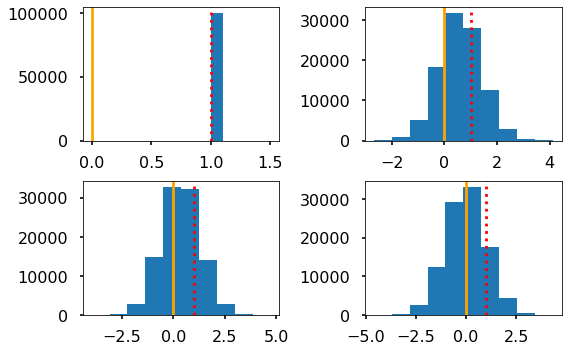

In [16]:
fig, ax = plt.subplots(2,2, figsize=(8, 5))
ax[0, 0].hist(sample_big[0, :])
ax[0, 0].axvline(1, color = "red", linestyle=":")
ax[0, 0].axvline(0, color = "orange")

ax[0, 1].hist(sample_big[int(0.5 / deltat), :])
ax[0, 1].axvline(1, color = "red", linestyle=":")
ax[0, 1].axvline(0, color = "orange")

ax[1, 0].hist(sample_big[int(1 / deltat), :])
ax[1, 0].axvline(1, color = "red", linestyle=":")
ax[1, 0].axvline(0, color = "orange")

ax[1, 1].hist(sample_big[int(10 / deltat), :])
ax[1, 1].axvline(1, color = "red", linestyle=":")
ax[1, 1].axvline(0, color = "orange")

plt.tight_layout()
plt.show()

In [17]:
n = 100000
deltat = 0.5
end = 10

In [18]:
sample_small = generate_sample(n, deltat, end)

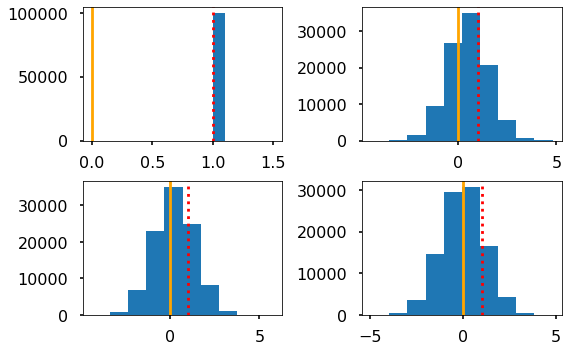

In [19]:
fig, ax = plt.subplots(2,2, figsize=(8, 5))
ax[0, 0].hist(sample_small[0, :])
ax[0, 0].axvline(1, color = "red", linestyle=":")
ax[0, 0].axvline(0, color = "orange")

ax[0, 1].hist(sample_small[int(0.5 / deltat), :])
ax[0, 1].axvline(1, color = "red", linestyle=":")
ax[0, 1].axvline(0, color = "orange")

ax[1, 0].hist(sample_small[int(1 / deltat), :])
ax[1, 0].axvline(1, color = "red", linestyle=":")
ax[1, 0].axvline(0, color = "orange")

ax[1, 1].hist(sample_small[int(10 / deltat), :])
ax[1, 1].axvline(1, color = "red", linestyle=":")
ax[1, 1].axvline(0, color = "orange")

plt.tight_layout()
plt.show()

### iii)

There are two main observations to point out. First, from how the discretization formula and part i we can see a pattern that the value of the expectation of x gets smaller in each step. This is also apparent in the values of histograms in part ii. We can see that when we start from 1 we quickly approach mean 0 with only a few steps. Second, Because the variance at each time step has a positive relationship with $\delta t$ the variance of the samples derived with $\delta t = 0.5$ is higher than $\delta t = 0.01$.